# Analyzing Crime in Los Angeles

## The Data
The dataset used for this project is a modified version of the original data, which is publicly available from Los Angeles Open Data.

We are going to use the data to answer important questions about crime and help the LAPD allocate resources more efficiently.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

## 1. Prepare Data

In [35]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


## 2. Finding which hour has the highest frequency of crime

The peak crime hour is at 12


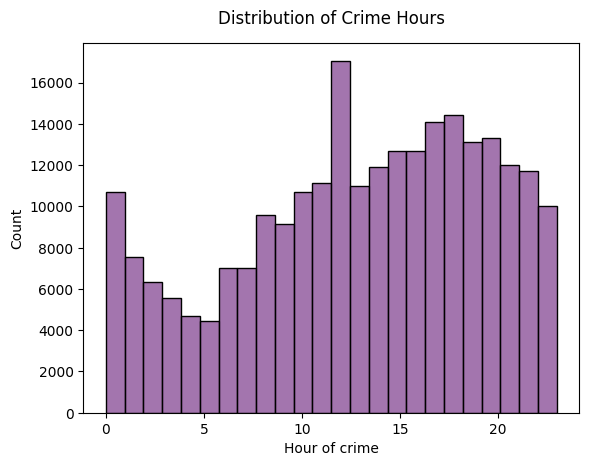

In [36]:
# Creating a variable to find the peak crime hour
peak_crime_hour = int(crimes['TIME OCC'].str[:2].value_counts().idxmax())

print("The peak crime hour is at", peak_crime_hour)

# Round to the closest hour 
crimes['crime_hours_rounded'] = np.floor(crimes['TIME OCC'].astype(int) / 100)

# Plot
p1 = sns.histplot(data = crimes, x = 'crime_hours_rounded', bins = 24 )

p1.set_title("Distribution of Crime Hours", y = 1.03)
p1.set(xlabel = "Hour of crime",
       ylabel = "Count")
plt.show()

## 3. Finding the area with the largest amount of crime 
Now, we are going to find the largest frequency of night crimes commited between 10pm and 3:59 am

The area with the highest crime rate bewteen 10 pm and 3:59 am is Central


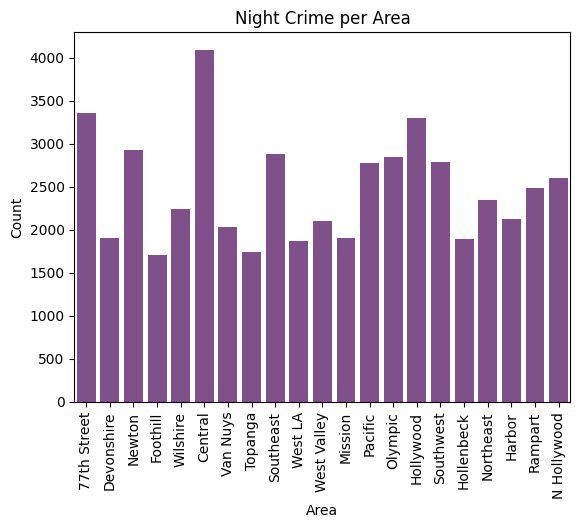

In [38]:
# Filter for times 
night_crimes = crimes.query('`TIME OCC` >= "2200" or `TIME OCC` <= "0359"')

# Count values
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()

print("The area with the highest crime rate bewteen 10 pm and 3:59 am is", peak_night_crime_location)

# Make a count plot of the number of crimes per area
sns.set_palette("PRGn")
p2 = sns.countplot(data = night_crimes, x = 'AREA NAME')

p2.set_title("Night Crime per Area")
p2.set(xlabel = "Area",
       ylabel = "Count")
plt.xticks(rotation = 90)
plt.show()

## 4. Commited Crimes by Age Group
Now, we will be identifying the number of crimes commited against victims per age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+)

In [39]:
# Inspect and filter Age
crimes = crimes[crimes['Vict Age'] > 0 ]

# Create the bins & labels for the .cut function
age_bins = [0, 17, 25, 34, 44, 54, 64, 500]
age_labels = ["0-17", "18-25", "25-34", "35-44", "45-54", "55-64", "65+"]

# Perform the categorical function addition with .cut
crimes['age_group'] = pd.cut(crimes['Vict Age'], labels = age_labels, bins = age_bins)

# Identify numbver of crimes
victim_ages = crimes['age_group'].value_counts()

print(victim_ages)


25-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: age_group, dtype: int64
